In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
from textblob import TextBlob
# 使用textblob模块制作一个名为stringToSentiment的函数,
# 返回一个句子的情感。
def stringToSentiment(text): 
    return TextBlob(text).sentiment.polarity 

In [29]:
print(stringToSentiment('i hate you') )
# -0.8 
 
print(stringToSentiment('i love you') )
# 0.5 
 
print(stringToSentiment('i see you') )
# 0.0 

-0.8
0.5
0.0


In [30]:
import pandas as pd 

In [31]:
# 将推文数据读入一个dataframe中 
# these tweets are from last May and are about Apple (AAPL) 
tweets = pd.read_csv('data/so_many_tweets.csv') 
tweets.head()

,Text,Date,Status,Retweet
0,RT @j_o_h_n_danger: $TWTR now top holding for ...,2015-05-24 03:46:08,602319644234395648,6.022899e+17
1,RT diggingplatinum RT WWalkerWW: iOS 9 vs. And...,2015-05-24 04:17:42,602327586983796737,NaN
2,RT bosocial RT insidermonkey RT j_o_h_n_danger...,2015-05-24 04:13:22,602326499534966784,NaN
3,RT @WWalkerWW: iOS 9 vs. Android M – The New F...,2015-05-24 04:08:34,602325288740114432,6.023104e+17
4,RT @seeitmarket: Apple Chart Update: Big Test ...,2015-05-24 04:04:42,602324318903771136,6.023215e+17


In [32]:
tweets.shape 

(52512, 4)

In [33]:
# 在tweets中创建一个名为sentiment的新列，将stringToSentiment映射到文本列。
tweets['sentiment'] = tweets['Text'].apply(stringToSentiment) 
tweets.head() 

,Text,Date,Status,Retweet,sentiment
0,RT @j_o_h_n_danger: $TWTR now top holding for ...,2015-05-24 03:46:08,602319644234395648,6.022899e+17,0.500000
1,RT diggingplatinum RT WWalkerWW: iOS 9 vs. And...,2015-05-24 04:17:42,602327586983796737,NaN,0.136364
2,RT bosocial RT insidermonkey RT j_o_h_n_danger...,2015-05-24 04:13:22,602326499534966784,NaN,0.500000
3,RT @WWalkerWW: iOS 9 vs. Android M – The New F...,2015-05-24 04:08:34,602325288740114432,6.023104e+17,0.136364
4,RT @seeitmarket: Apple Chart Update: Big Test ...,2015-05-24 04:04:42,602324318903771136,6.023215e+17,0.000000


In [34]:
tweets.index = pd.RangeIndex(start=0, stop=52512, step=1)  
# 作为一个列表,可以将其拼接 
list(tweets.index)[:5] 

[0, 1, 2, 3, 4]

In [35]:
# 将日期列转为日期时间 
tweets['Date'] = pd.to_datetime(tweets.Date) 
tweets['Date'].head() 

0   2015-05-24 03:46:08
1   2015-05-24 04:17:42
2   2015-05-24 04:13:22
3   2015-05-24 04:08:34
4   2015-05-24 04:04:42
Name: Date, dtype: datetime64[ns]

In [36]:
tweets.index = tweets.Date 
tweets.index 

DatetimeIndex(['2015-05-24 03:46:08', '2015-05-24 04:17:42',
               '2015-05-24 04:13:22', '2015-05-24 04:08:34',
               '2015-05-24 04:04:42', '2015-05-24 04:00:01',
               '2015-05-24 03:54:07', '2015-05-24 04:25:29',
               '2015-05-24 04:24:47', '2015-05-24 04:06:42',
               ...
               '2015-05-02 16:30:02', '2015-05-02 16:29:35',
               '2015-05-02 16:28:26', '2015-05-02 16:27:53',
               '2015-05-02 16:27:02', '2015-05-02 16:26:39',
               '2015-05-02 16:25:00', '2015-05-02 16:23:39',
               '2015-05-02 16:23:38', '2015-05-02 16:23:21'],
              dtype='datetime64[ns]', name='Date', length=52512, freq=None)

In [37]:
tweets.head() 

,Text,Date,Status,Retweet,sentiment
Date,,,,,
2015-05-24 03:46:08,RT @j_o_h_n_danger: $TWTR now top holding for ...,2015-05-24 03:46:08,602319644234395648,6.022899e+17,0.500000
2015-05-24 04:17:42,RT diggingplatinum RT WWalkerWW: iOS 9 vs. And...,2015-05-24 04:17:42,602327586983796737,NaN,0.136364
2015-05-24 04:13:22,RT bosocial RT insidermonkey RT j_o_h_n_danger...,2015-05-24 04:13:22,602326499534966784,NaN,0.500000
2015-05-24 04:08:34,RT @WWalkerWW: iOS 9 vs. Android M – The New F...,2015-05-24 04:08:34,602325288740114432,6.023104e+17,0.136364
2015-05-24 04:04:42,RT @seeitmarket: Apple Chart Update: Big Test ...,2015-05-24 04:04:42,602324318903771136,6.023215e+17,0.000000


In [38]:
# 创建一个名为daily_tweets的dataframe，按D重新取样推文，
# 对各列进行平均。
daily_tweets = tweets['sentiment'].resample('D').mean()
daily_tweets_df = pd.DataFrame({'sentiment': daily_tweets})
# 只想在新dataframe中看到情感列
daily_tweets_df.head()

,sentiment
Date,
2015-05-02,0.083031
2015-05-03,0.107045
2015-05-04,0.084062
2015-05-05,0.063895
2015-05-06,0.067004


In [39]:
daily_tweets_df.shape

(23, 1)

<AxesSubplot:xlabel='Date'>

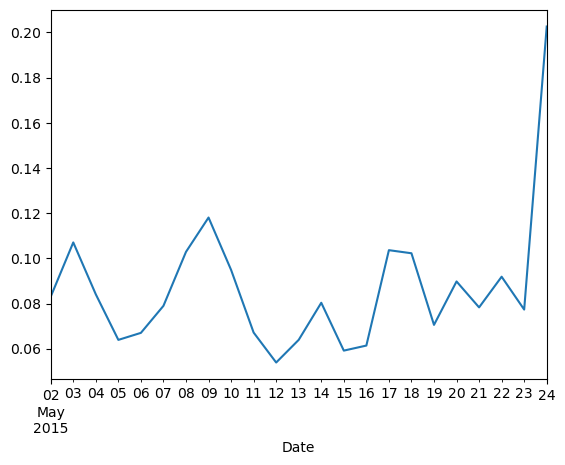

In [40]:
daily_tweets_df.sentiment.plot(kind='line') 

 pandas_datareader模块可以用来获取各种金融数据，例如股票价格，货币汇率等等。

In [41]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import datetime 
yf.pdr_override()

In [54]:
myproxy = {'http':'127.0.0.1:58591', 'https':'127.0.0.1:58591'}
historical_prices = pdr.get_data_yahoo('AAPL',
                                       start=datetime.datetime(2022, 5, 2),
                                       end=datetime.datetime(2022, 5, 25), proxy=myproxy)

# 将数据框的索引时区设置为UTC
historical_prices.index = pd.DatetimeIndex(historical_prices.index).tz_localize('UTC')

prices = pd.DataFrame(historical_prices)

prices.head()

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAPL: No timezone found, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
